# Najbogatejši zemljani

### Projektna naloga iz analize podatkov pri predmetu Programiranje 1

Analiziral bom 500 najbogatejših zemljanov. Podatke sem pridobil s strani
[Bloomberg](https://www.bloomberg.com//billionaires/) (datum dostopa: 5. november 2019). Podatki so se do začetka analize nekoliko spremenili, zato bo prišlo do odstopanj razultatov v primerjavi z  najnovejšimi podatki.

Pred začetkom analize sem si postavil nekaj delovnih hipotez:
* milijarderji z  največjim prirastom primoženja prihajajo iz hitro razvijajočih se držav (predvsem Azijske države). 
* Bogastvo je neenakomerno razporejeno po svetu.
* Najbolj dobičkonosno področje je tehnologija.
* ...

Opravil bom še druge analize in od tod sklepal o pomembnih ugotovitvah.

Za podatke sem zajel naslednje podatke:
* ime in priimek,
* premoženje v $,
* zadnja sprememba premoženja v $,
* letna sprememba premoženja v $,
* država bivanja,
* področje delovanja 

Zajete so še tudi relativne spremembe premoženj.

Najprej si pripravimo delovno okolje:

In [37]:
import pandas as pd
import geopandas 
import matplotlib.pyplot as plt
import descartes

plt.rcParams['figure.figsize'] = [13, 8]

milijarderji = pd.read_csv('obdelani_podatki/podatki.csv',index_col='mesto')
pd.options.display.max_rows = 20

## 1. Analiza premoženja glede na državo porekla



In [38]:
milijarderji.groupby('drzava')['drzava'].count().sort_values(ascending=False)

drzava
United States         178
China                  44
Germany                32
Russian Federation     23
Hong Kong              20
                     ... 
Czech Republic          1
New Zealand             1
Finland                 1
Georgia                 1
Viet Nam                1
Name: drzava, Length: 47, dtype: int64

Prikažimo podatke še s tortnim diagramom.

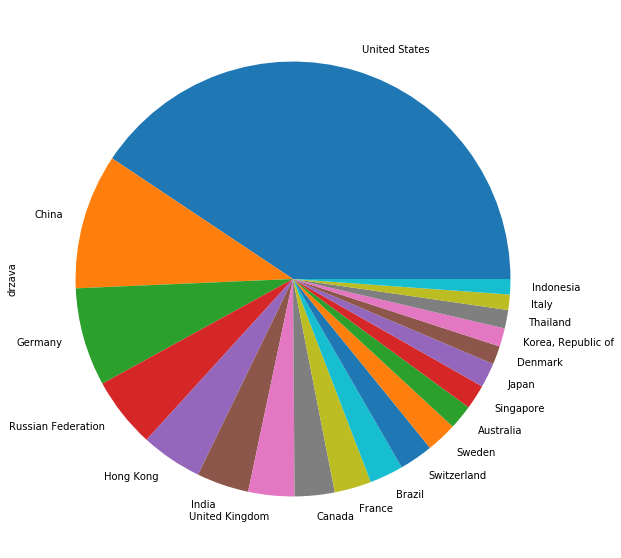

In [39]:
milijarderji['drzava'].value_counts().head(20).plot(figsize=[15,10], kind = 'pie')

Vidimo, da največ milijarderjev prihaja iz Združenih držav Amerike.  Poglejmo si še sedaj, iz kod prihajajo milijarderji, ki so v prejšnjem letu (relativno) pridobili največ premoženja. Natančneje si bomo ogledali milijarderje, ki so v 2019 pridobili za več kot 70 \% novega premoženja.

In [40]:
najvecje_spremembe = milijarderji[milijarderji.letna_sprememba_procenti >= 70]
najvecje_spremembe

,ime,premozenje,zadnja_sprememba,zadnja_sprememba_procenti,letna_sprememba,letna_sprememba_procenti,drzava,podrocje
mesto,,,,,,,,
45,Colin Huang,21500000000,316000000,1.5,9880000000,84.9,China,Technology
98,Sun Piaoyang,13900000000,247000000,1.8,7860000000,129.2,China,Health Care
111,Zhong Huijuan,12500000000,-148000000,-1.2,6230000000,99.3,China,Health Care
116,Patrick Drahi,12200000000,152000000,1.3,6230000000,104.7,France,Media & Telecom
124,Liu Yonghao,11600000000,54400000,0.5,5820000000,100.3,China,Diversified
...,...,...,...,...,...,...,...,...
489,David Bonderman,4230000000,46400000,1.1,1860000000,78.8,United States,Finance
494,Patrick Collison,4200000000,0,0.0,1770000000,72.5,Ireland,Technology
495,John Collison,4200000000,0,0.0,1770000000,72.5,Ireland,Technology


In [41]:
max_spremembe_grupirano = najvecje_spremembe.groupby('drzava')['drzava'].count().sort_values(ascending=False)

In [42]:
max_spremembe_grupirano

drzava
China            10
United States     5
Singapore         2
Ireland           2
Thailand          1
France            1
Australia         1
Name: drzava, dtype: int64

Opazimo, da največ takih milijarderjev prihaja iz Kitajske. Na seznamu pa najdemo tudi države kot so Singapur, in Tajska. Poglejmo si še v kateri panogi delujejo.

In [43]:
panoga_max_sprememba = najvecje_spremembe.groupby('podrocje')['podrocje'].count().sort_values(ascending=False)

In [44]:
panoga_max_sprememba

podrocje
Technology         5
Health Care        3
Food & Beverage    3
Media & Telecom    2
Industrial         2
Services           1
Real Estate        1
Finance            1
Energy             1
Diversified        1
Consumer           1
Commodities        1
Name: podrocje, dtype: int64

Vidimo lahko, da milijarderji, ki so lani relativno pridobili največ premoženja, delujejo v področju tehnologije, zdravstva in nege ter prehrambene industrije.

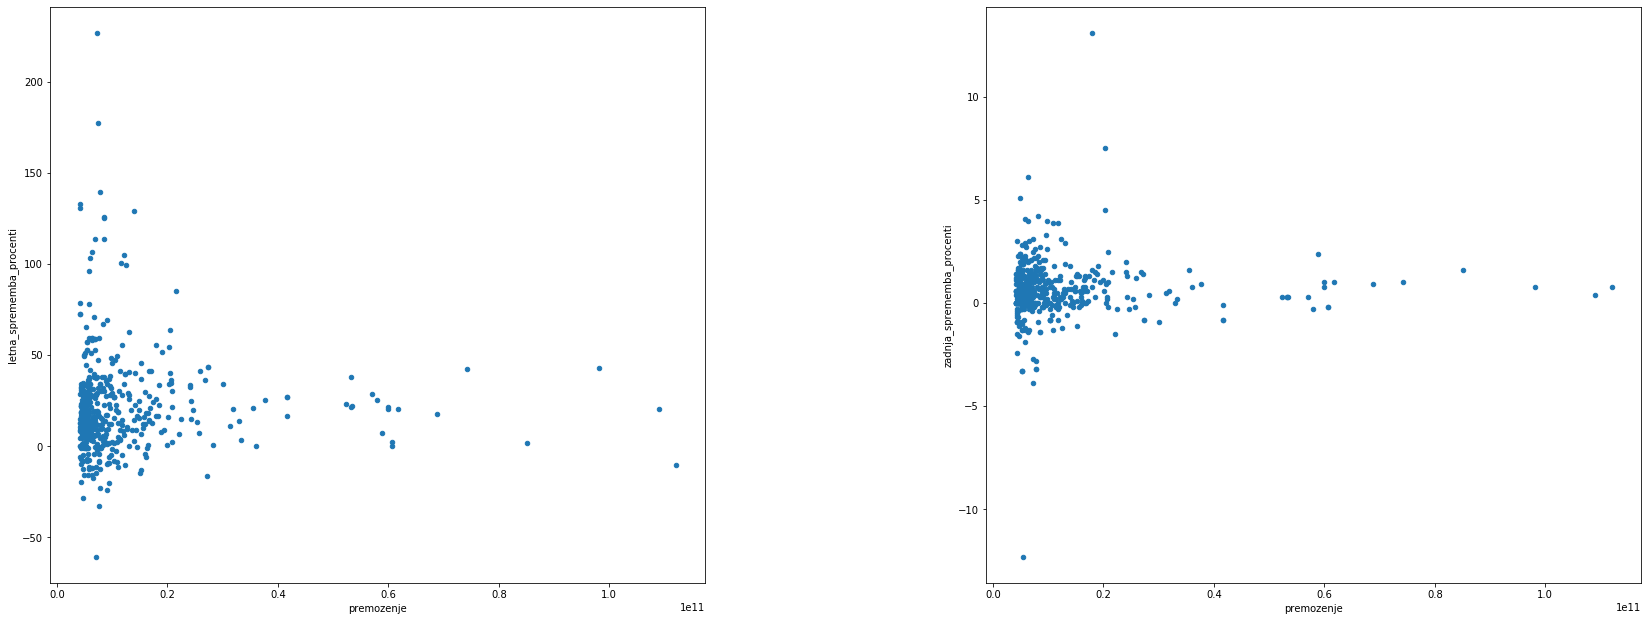

In [45]:
fig = plt.figure(1)
ax1 = fig.add_subplot(position=[0, 0, 0.7, 1])
ax2 = fig.add_subplot(position=[1, 0, 0.7, 1])

plt1=milijarderji[['premozenje', 'letna_sprememba_procenti']].plot.scatter('premozenje', 'letna_sprememba_procenti', ax=ax1)
plt2=milijarderji[['premozenje', 'zadnja_sprememba_procenti']].plot.scatter('premozenje', 'zadnja_sprememba_procenti', ax=ax2)

Pri milijarderjih z manjšim premoženjem opazimo, da lahko pri nijh prihaja do večjih nihanj pri količini premoženja. Pri tistih, ki imajo večje premoženje, se le to ne spreminja veliko. Torej, najbogatejši dobro ohranjajo svoje premoženje (če se le ne ločijo od svoje žene).

## 2. Porazdelitev premoženja po svetu

V tem razdleku bomo raziskali porazdelitev premoženja po svetu. V ta namen sem že na začetku naložil paket `goepandas`, ki omogoča grafični prikaz podatkov na zemljevidu.

Pripravimo si še seznam držav z njihovimi zemljepisnimi širinami in dolžinami ([vir](https://developers.google.com/public-data/docs/canonical/countries_csv)).

In [46]:
drzave = pd.read_csv('drzave.csv', index_col='drzava')

In [47]:
drzave

,id,latitude,longitude
drzava,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953
Antigua and Barbuda,AG,17.060816,-61.796428
Anguilla,AI,18.220554,-63.068615
...,...,...,...
Yemen,YE,15.552727,48.516388
Mayotte,YT,-12.827500,45.166244
South Africa,ZA,-30.559482,22.937506


In [48]:
milijarderji_z_lokacijo=pd.merge(milijarderji, drzave, on='drzava')

In [49]:
milijarderji_z_lokacijo

,ime,premozenje,zadnja_sprememba,zadnja_sprememba_procenti,letna_sprememba,letna_sprememba_procenti,drzava,podrocje,id,latitude,longitude
0,Jeff Bezos,112000000000,876000000,0.8,-13200000000,-10.6,United States,Technology,US,37.090240,-95.712891
1,Bill Gates,109000000000,453000000,0.4,18300000000,20.2,United States,Technology,US,37.090240,-95.712891
2,Warren Buffett,85100000000,1340000000,1.6,1300000000,1.6,United States,Diversified,US,37.090240,-95.712891
3,Mark Zuckerberg,74200000000,727000000,1.0,22200000000,42.6,United States,Technology,US,37.090240,-95.712891
4,Larry Page,61700000000,616000000,1.0,10500000000,20.4,United States,Technology,US,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...
487,Kenneth Dart,5850000000,32700000,0.6,1280000000,28.0,Cayman Islands,Finance,KY,19.513469,-80.566956
488,Rinat Akhmetov,5420000000,107000000,2.0,208000000,4.0,Ukraine,Industrial,UA,48.379433,31.165580
489,Bidzina Ivanishvili,5420000000,25000000,0.5,425000000,8.5,Georgia,Diversified,GE,42.315407,43.356892
490,Antti Herlin,5360000000,29500000,0.6,1340000000,33.2,Finland,Industrial,FI,61.924110,25.748151


In [50]:
gdf = geopandas.GeoDataFrame(milijarderji_z_lokacijo,
      geometry=geopandas.points_from_xy(milijarderji_z_lokacijo.longitude,milijarderji_z_lokacijo.latitude))

In [51]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

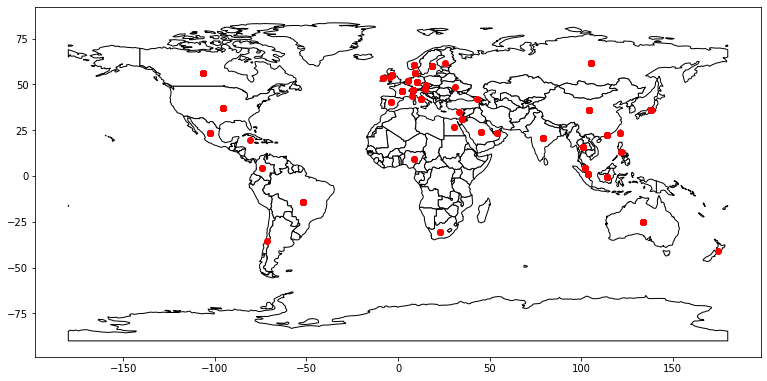

In [52]:
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

Na zgornjem zemljevidu so označene samo države  iz katerih prihajajo milijarderji. Spodaj pa je upoštevano še število posameznih milijarderjev. Tako so države z večjim številom milijarderjev označene z največjim krogcem.

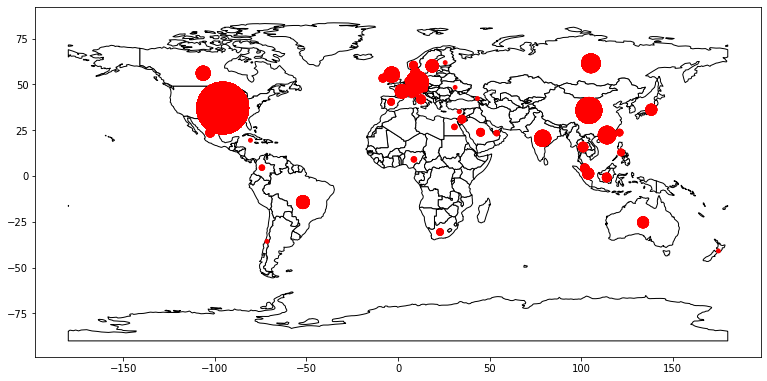

In [53]:
ax = world.plot(color='white', edgecolor='black')
grupirane_drzave = milijarderji.groupby('drzava')['drzava'].count().sort_values(ascending=False)
gdf.plot(markersize = grupirane_drzave.get(milijarderji_z_lokacijo.drzava)*15 ,ax=ax, color='red')

Poglejmo si sedaj še razporeditev denarja milijarderjev po svetu.

In [54]:
vso_premozenje = milijarderji_z_lokacijo['premozenje'].sum()
vso_premozenje_po_drzavah = milijarderji_z_lokacijo.groupby('drzava')['premozenje'].sum()

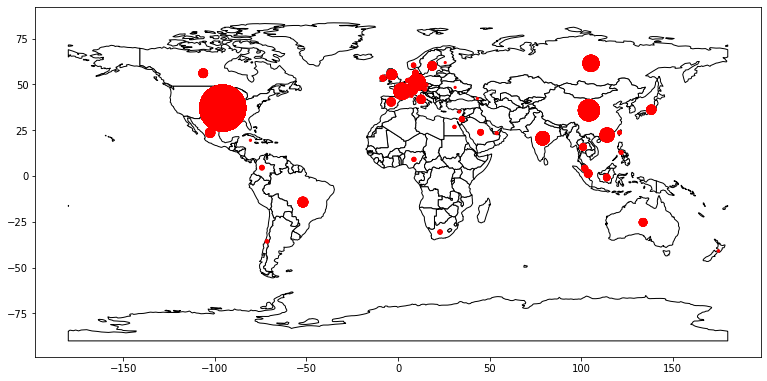

In [55]:
ax = world.plot(color='white', edgecolor='black')
gdf.plot(markersize = vso_premozenje_po_drzavah.get(milijarderji_z_lokacijo.drzava)*5000/vso_premozenje,
         ax=ax, color='red')

Denar milijarderjev je pričakovano neenakomerno porazdeljen po svetu. Opazimo, da gre predvsem za območja Združenih držav Amerike, Evropo, Rusijo, Indija in Kitajska (dežave z velikim številom milijarderjev).

## 3.  Dobičkonosnosti področij

Ogledali si bomo katera področja prinašajo največ dobička in katera manj, ali celo prinašajo izgubo. Do sklepov pa moramo biti malce skeptični, saj so dobički in izgube podjetij odvisne tudi od drugih faktorjev.

In [56]:
grupirano_podrocja = milijarderji.groupby('podrocje')['drzava'].count().sort_values(ascending=False)

In [57]:
grupirano_podrocja

podrocje
Technology         64
Diversified        55
Industrial         51
Real Estate        42
Finance            41
Retail             40
Food & Beverage    39
Consumer           36
Energy             29
Media & Telecom    28
Health Care        25
Commodities        19
Entertainment      17
Services           13
Name: drzava, dtype: int64

In [58]:
grupirano_podrocje_premozenje = milijarderji.groupby('podrocje')['premozenje'].sum().sort_values(ascending=False)

In [59]:
grupirano_podrocje_premozenje

podrocje
Technology         1153219999998
Diversified         634719999997
Industrial          573420000000
Retail              556720000000
Consumer            511300000000
Food & Beverage     424669999999
Real Estate         402320000000
Finance             345000000000
Energy              284129999999
Media & Telecom     209390000000
Health Care         188030000000
Commodities         166650000000
Entertainment       142379999998
Services             89780000000
Name: premozenje, dtype: int64

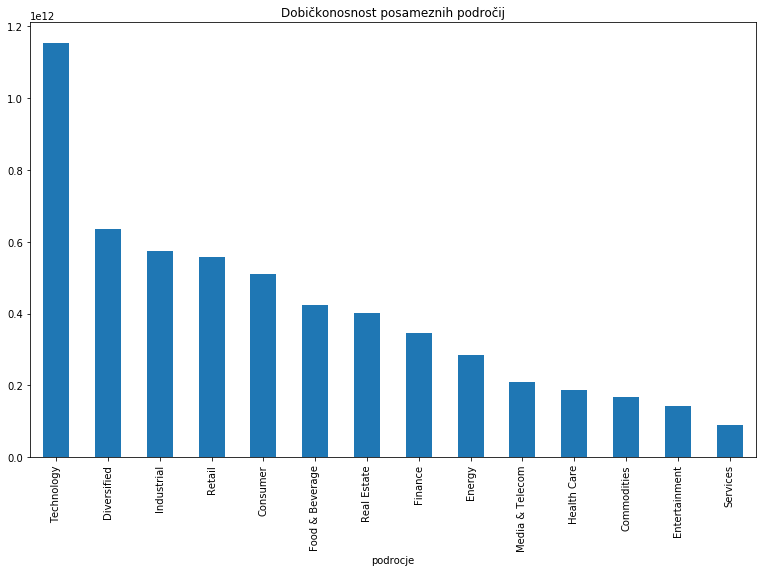

In [60]:
grupirano_podrocje_premozenje.head(20).plot(kind = 'bar', title='Dobičkonosnost posameznih področij')

In [61]:
grupirano_podrocje_premozenje_letno = milijarderji.groupby('podrocje')['letna_sprememba'].sum().sort_values(ascending=False)

In [62]:
grupirano_podrocje_premozenje_letno

podrocje
Technology         196716500000
Industrial         125935899998
Consumer           111218800000
Retail             101003899999
Food & Beverage     84674700000
Diversified         62307159999
Finance             50265900000
Health Care         40474000000
Energy              33433080000
Real Estate         32061399999
Media & Telecom     27368999999
Commodities         22275400000
Entertainment       20319100000
Services            17005000000
Name: letna_sprememba, dtype: int64

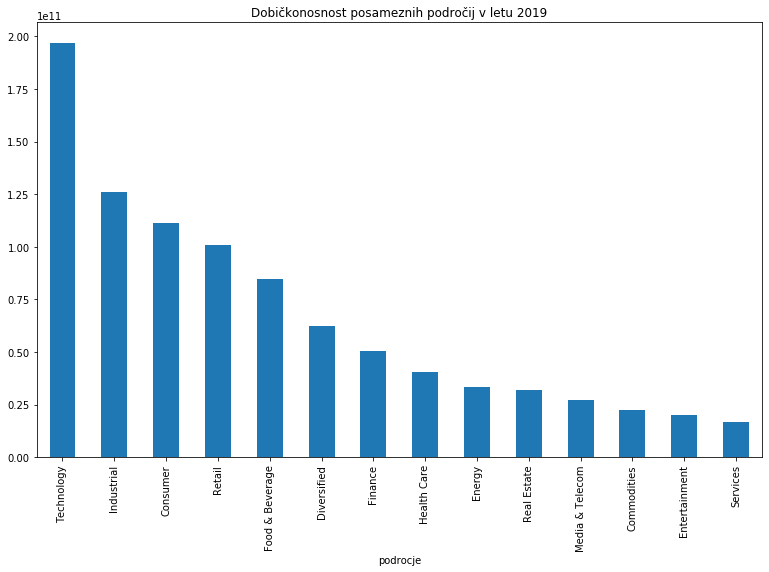

In [63]:
grupirano_podrocje_premozenje_letno.head(20).plot(kind = 'bar',
                                                  title='Dobičkonosnost posameznih področij v letu 2019')

Vidimo, da je v letu 2019 največ dobička bilo področju tehnologije, prav tako pa je tehnologija področje, kjer imajo milijarderji največ denarja. Opazimo, da tudi ni prevelikih razlik med letnim dobičkom in splošnim premoženjem glede na panogo. Poglejmo si sedaj ali obstaja korelacija med premoženjem in letno spremembo premoženja pri podjetjih, ki delujejo na področju tehnologije.

In [64]:
milijarderji_tehn = milijarderji[milijarderji.podrocje == 'Technology']

In [65]:
milijarderji_tehn

,ime,premozenje,zadnja_sprememba,zadnja_sprememba_procenti,letna_sprememba,letna_sprememba_procenti,drzava,podrocje
mesto,,,,,,,,
1,Jeff Bezos,112000000000,876000000,0.8,-13200000000,-10.6,United States,Technology
2,Bill Gates,109000000000,453000000,0.4,18300000000,20.2,United States,Technology
5,Mark Zuckerberg,74200000000,727000000,1.0,22200000000,42.6,United States,Technology
7,Larry Page,61700000000,616000000,1.0,10500000000,20.4,United States,Technology
10,Larry Ellison,60000000000,505000000,0.8,10700000000,21.6,United States,Technology
...,...,...,...,...,...,...,...,...
486,Mark Cuban,4250000000,25000000,0.6,350000000,9.0,United States,Technology
492,Barry Lam,4219999999,48600000,1.2,546000000,14.8,Taiwan,Technology
493,Brian Acton,4200000000,25000000,0.6,475000000,12.8,United States,Technology


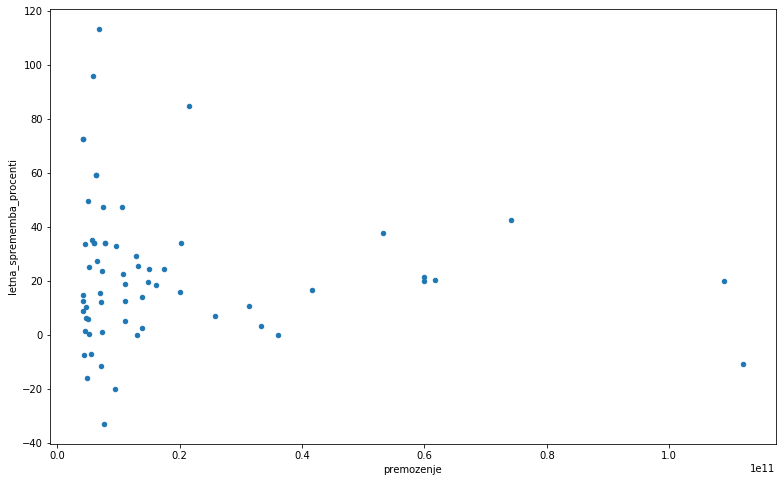

In [66]:
milijarderji_tehn[['premozenje', 'letna_sprememba_procenti']].plot.scatter('premozenje', 
                                                                          'letna_sprememba_procenti')

Opazimo, da pri osebah z manjšim premoženjem, ki delujejo na področju tehnologije, ni  korelacije med premoženjem in letnim prirastom. Opazimo pa, da tako veliki odstopanj pri večjih premoženjih ni (zaradi majhnega vzorca graf ni najbolj natančen).

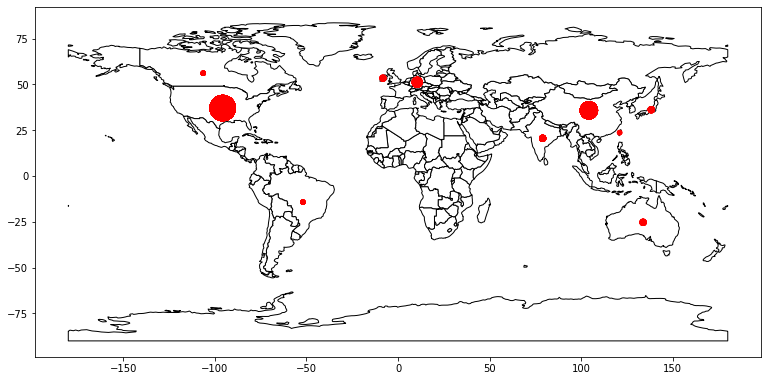

In [67]:
ax = world.plot(color='white', edgecolor='black')
grupirane_drzave = milijarderji_tehn.groupby('drzava')['drzava'].count().sort_values(ascending=False)
gdf.plot(markersize = grupirane_drzave.get(milijarderji_z_lokacijo.drzava)*20 ,ax=ax, color='red')

Zgornji zemljevid nam pove, da je največ milijarderjev s področja tehmnolgije prihaja iz Združenih držav Amerike in Kitajske, nekaj malega pa tudi iz Evrope.

Za zanimivost poglejmo na katerem področju delujejo milijarderji iz Rusije.

In [68]:
milijarderji_rus = milijarderji[milijarderji.drzava == 'Russian Federation']

In [69]:
milijarderji_rus.groupby('podrocje')['drzava'].count().sort_values(ascending=False)

podrocje
Diversified    9
Industrial     8
Energy         3
Commodities    3
Name: drzava, dtype: int64

Podrocje *diversified* - *raznoliko* nam ne pove veliko (verjetno je izvor njihovega premoženja neznan), venda vseeno vidimo, da se 11 milijarderjev iz Rusije ukvarja z industrijo in energetiko.

## 4. Splošno

Celotno svetovno premoženje naj bi po podatkih znašali 360 bilijona ameriških dolarjev (Global welath report 2019, Credit Suisse). vso premoženje 500 najbogatejših zemljanov pa približno 5,6 bilijona ameriških dolarjev.

In [70]:
vso_premozenje

5628539999991

Celotno premoženje 500 najbogatejših zemljanov pa približno 5,6 bilijona ameriških dolarjev.

In [71]:
vso_premozenje/(360*10**12)*100

1.5634833333308333

Torej ima 500 najbogatejših zemljanov v lasti približno 1,5 % vsega svetovnega premoženja.

Po nezanesljivih virih iz Reddit-a bi lahko *vsem* (ne samo tem 500-tim) svetovnim milijarderjem "vzeli" približno 6,5 bilijona ameriških dolarjev premoženja, a bi ti še vseeno ostali milijarderji. Le 1/20 tega denarja bi bila potrebna, da bi ustavili globalno segrevanje do leta 2030, vseh 6,5 bilijonov pa, da bi izkoreninili svetovno lakoto.

## 5. Zaključek

Nad rezultati analize podatkov nisem presenečen, čeprav bi si ob ponovni izbiri teme želel večje število podatkov. Skoraj zagotovo lahko potrdim svoje hipoteze: milijarderji z največjim letnim prirastom premoženja res prihajajo iz razvijajočih se držav (Kitajske), in delujejo na področju tehnolohije.

Prav tako sem lahko potrdil neenakomerno porazdelitev bogastva po svetu, opazno predvsem v  Afriki in Južni Ameriki ni veliko milijarderjev. 

Najbolj dobičkonosno področje milijarderjev pa je tehnologija, kar spet ni presenetljivo.

Ampak prihodnost ni svetla. Do leta 2030 bi lahko imel 1 % najbogatejših zemljanov v lasti 2/3 vsega svetovnega premoženja.